# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')

In [5]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [8]:
#Your code here
import flatiron_stats as fs

In [11]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = df[(df[f1].notnull()) & (df[f2].notnull())]

In [12]:
subset.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.0
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.8
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.4
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.9
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.4


In [13]:
s1 = subset[subset[f1]==f1c1][f2]
s2 = subset[subset[f1]==f1c2][f2]

In [15]:
s1.head()

3     250000.000
14     36634.400
27     53352.000
31     35419.104
37     80000.000
Name: AdjustedCompensation, dtype: float64

In [14]:
s2.head()

8     64184.800
9     20882.400
11     1483.900
21    20000.000
25    10858.848
Name: AdjustedCompensation, dtype: float64

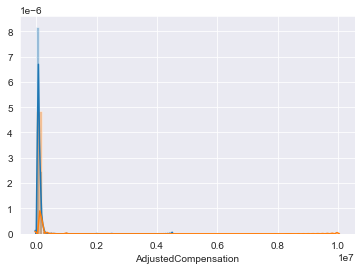

In [16]:
sns.distplot(s1)
sns.distplot(s2)

In [17]:
print('Comparison of {} for {} and {}'.format(f2, f1c1, f1c2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.33077639451272267


## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!